In [102]:
from os.path import isfile, join
import matplotlib.pyplot as plt
from os import listdir
import pandas as pd
import numpy as np
import os

In [103]:
files = [f for f in listdir(".") if isfile(join(".", f))]
files.remove("visualize_csv.ipynb")
files.remove('csvconvert.py')
files

['mao.R.csv',
 'pe.L.csv',
 'canela.R.csv',
 'cabeca.csv',
 'pelvis.csv',
 'clavicula.L.csv',
 'femur.R.csv',
 'pontape.L.csv',
 'antebraco.L.csv',
 'braco.R.csv',
 'clavicula.R.csv',
 'canela.L.csv',
 'torax.csv',
 'antebraco.R.csv',
 'respiracao.csv',
 'femur.L.csv',
 'pe.R.csv',
 'abdomen.csv',
 'braco.L.csv',
 'pontape.R.csv',
 'pescoco.csv']

In [104]:
part = "pelvis" 
data = pd.read_csv("{}.csv".format(part))
data

,LinVel: x,y,z,AngVel: x,y.1,z.1,time,name
0,34.065170,28.894480,-9.240989,0.000043,0.000002,4.142596e-07,0.539279,pelvis
1,2.757611,106.455700,4.305785,0.021110,0.003845,1.226883e+01,1.052474,pelvis
2,2.027070,-0.400903,-0.022777,-0.087261,0.021512,1.122789e-03,1.555731,pelvis
3,-1.009866,0.249021,0.016026,0.092152,0.037383,2.246236e-03,2.057780,pelvis
4,-2.424277,0.357457,-0.027789,-0.063028,1402.832000,-6.503468e-06,2.571023,pelvis
5,-3.210566,0.329024,-0.004808,-0.025855,0.002031,-1.321501e-03,3.071494,pelvis
6,0.890573,-0.090359,0.020533,0.060002,-0.002552,-1.570731e-03,3.577557,pelvis
7,2.975741,-0.301320,0.016640,0.045663,-0.000326,6.240700e-04,4.089488,pelvis
8,1.787631,-0.353598,-0.011404,0.070095,0.029993,1.623620e-03,4.597568,pelvis
9,0.822834,-0.152489,0.003453,-0.014683,-0.029200,-4.184709e-03,5.106799,pelvis


In [120]:
def drop(data, sort, percent=0.06, by_axis=False):
    to_drop = []
    i = 0
    while i < len(sort) * percent:
        to_drop.append(sort[i][0])
        i += 1
    
    return data.drop(data.index[to_drop])

def filter_data(data, key, percent=0.2, by_axis=False):
    if by_axis:
        y = data.iloc[:,key]
    else:
        y = data[key]
        
    x = range(len(y))
    xy = list(zip(x, y))
    sort = sorted(xy, key=lambda tup: tup[1], reverse=True)
    data = drop(data, sort)
    data.reset_index(drop=True)
    if by_axis:
        y = data.iloc[:,key]
    else:
        y = data[key]
        
    x = range(len(y))
    xy = list(zip(x, y))
    sort = sorted(xy, key=lambda tup: tup[1], reverse=True)
    
    if not by_axis:
        key = data.columns.get_loc(key)
    
    i = 0
    while i < len(y) * percent:
        row = sort[i][0]
        if (row == len(xy) - 1):
            data.iloc[row, key] = data.iloc[row - 1, key]
        elif (row == 0):
            data.iloc[row, key] = data.iloc[row + 1, key]
        else:    
            data.iloc[row, key] = 0.5 * (data.iloc[row - 1, key] + data.iloc[row + 1, key])
        i += 1
        
    return data
    

In [109]:
def integrate(xy):
    integrals = []
    integrals.append(xy[0][1] * xy[0][0])
    i = -1
    for element in xy:
        if i == -1:
            i += 1
            continue
        
        deltatime = element[0] - xy[i][0]
        integrals.append(element[1] * (deltatime) + integrals[i])
        i += 1
    return integrals

In [121]:
data = filter_data(data, "y.1")

[26, 2]


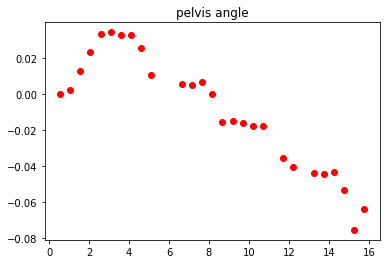

In [111]:
zipped = list(zip(data["time"], data["y.1"]))

plt.plot(data["time"], integrate(zipped), 'ro')
plt.title("{} angle".format(part))
plt.show()

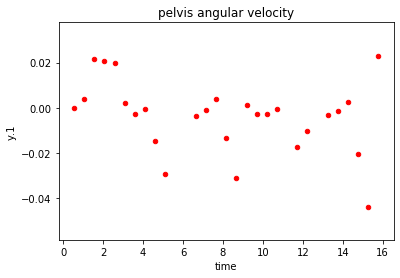

In [112]:
data.plot(kind="scatter", x="time", y="y.1", color="red")
plt.title("{} angular velocity".format(part))
plt.show()

[7, 19]
[0, 5]
[1, 11]
[0, 8]
[10, 21]
[15, 16]
    LinVel: x         y         z  AngVel: x       y.1        z.1       time  \
3   -0.099069 -1.343585 -0.040458  -0.165775  0.039693   0.224544   2.057780   
4   -0.077997 -1.324232 -0.000068  -0.165775 -0.434357  -0.746464   2.571023   
6    0.074627 -0.821269  0.027170  -0.209534 -0.162910  -0.465611   3.577557   
8   -0.136238  1.833529 -0.026892  -0.253292  0.108537  -0.184758   4.597568   
9    0.004395  0.740033 -0.007108  -0.092889 -0.085039   0.075930   5.106799   
10  -0.376877  1.304094  0.012677   0.017405  0.010376  -5.711413   6.132798   
11  -0.348015 -1.187675 -0.023140  -0.399966  0.105790  -8.640175   6.641951   
13   0.081548 -0.730146 -0.105981  -0.313744 -0.161455  -4.198767   7.662948   
15  -0.073103 -1.027971 -0.020427  -0.208327  0.053345  -2.188916   8.672464   
16  -0.012096 -1.708037 -0.012028  -0.102911 -0.466585  -0.179066   9.184596   
18   0.020239 -0.047368  0.016980  -0.114204 -0.258789  -0.077377  10.19

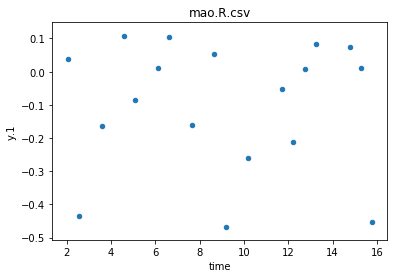

[0, 18]
[0, 17]
[9, 4]
[17, 23]
[13, 3]
[6, 14]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2  -20.701507  0.038967  0.168350   0.108564 -0.059306 -0.040204   1.555731   
3   -0.093745 -0.049159 -0.306223   0.364048 -0.049721  0.037809   2.057780   
4    0.026037 -0.039926  0.104255   0.104769 -0.040136 -0.003805   2.571023   
7   -0.042183  0.014875 -0.026494  -0.160284  0.050492  0.027409   4.089488   
8    0.026324  0.007319 -0.227277   0.356794 -0.049673  0.058623   4.597568   
9    0.035614 -0.000237 -0.428061   0.356636 -0.000779  0.024211   5.106799   
12   0.011914 -0.010620 -0.357523  -0.667507  0.027083  0.007097   7.150146   
13  -0.145969  0.015061  0.042698   0.122282 -0.015056 -0.010016   7.662948   
14  -0.114799  0.040742 -0.190126   0.230131 -0.058823  0.016391   8.171892   
15  -0.083628 -0.042431 -0.422951   0.182759 -0.064242  0.042798   8.672464   
16   0.022782 -0.039959  0.140857   0.135387 -0.069660 -0.024074   9.184596   
20  

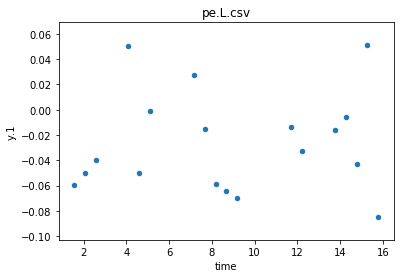

[0, 1]
[15, 3]
[15, 9]
[18, 4]
[21, 6]
[14, 15]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2    2.588173 -0.516440 -1.639569  -1.417234 -0.658779 -2.375961   1.555731   
3   -1.289644  0.373826 -1.639569  -1.417234  0.399543  1.238049   2.057780   
4   -3.040785  0.034555 -4.190745  -3.710034  0.054823  0.067027   2.571023   
6    1.197297 -0.304716  1.285080   1.016784 -0.289896 -1.103995   3.577557   
8    2.330862 -0.548245  2.846864   1.568522 -0.623151 -2.218852   4.597568   
9    0.970671 -0.146568  1.912198   2.120260 -0.176610 -0.828533   5.106799   
11  -2.477503  0.639666 -3.660019  -3.745978  0.206681 -1.362961   6.641951   
13   2.044012 -0.422975  2.448983   1.975007 -0.492293 -1.897389   7.662948   
14   0.543328 -0.581068  0.694854   0.581946 -0.721582 -2.587334   8.171892   
15  -0.957357  0.293950 -1.059275  -0.811115  0.325821  0.937915   8.672464   
16  -2.930604  0.066915 -4.047069  -3.581086  0.037376  0.229214   9.184596   
18  

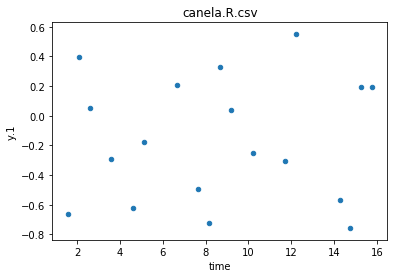

[0, 19]
[0, 11]
[3, 19]
[1, 11]
[18, 6]
[19, 4]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -4.545448 -0.087757 -0.063270  -0.087221  0.012606  0.001665   1.555731   
4   -2.450676 -0.025540  0.036027  -0.063014  0.012606 -0.000766   2.571023   
6    0.893808  0.051768 -0.007594  -0.008693 -0.002714 -0.003196   3.577557   
7    1.356436 -0.012450 -0.067125   0.045627 -0.000358 -0.000596   4.089488   
9    0.837524 -0.024004 -0.012947  -0.014782 -0.029365 -0.003776   5.106799   
11  -1.936434 -0.102756  0.001039   0.024615 -0.003596 -0.003956   6.641951   
13   1.581582  0.040408 -0.045419   0.004323 -0.004166  0.000000   7.662948   
14   0.414872 -0.099424 -0.067654  -0.097290 -0.002738  0.000358   8.171892   
16  -2.369449  0.003153  0.041105  -0.050963 -0.001311  0.000715   9.184596   
17  -3.279023 -0.173022  0.020128  -0.036084  0.009170  0.001146   9.690443   
18   0.316162  0.020604 -0.000850  -0.035583 -0.003104 -0.003530  10.191920   
20  

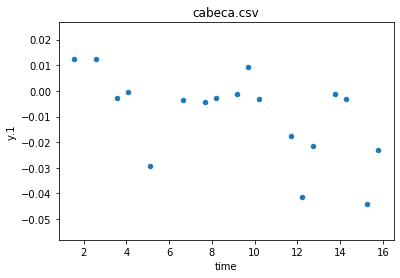

[0, 19]
[0, 26]
[10, 21]
[21, 1]
[21, 7]
[15, 5]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2    2.027070 -0.400903 -0.022777  -0.087261  0.021512 -0.000007   1.555731   
4   -2.424277  0.289022 -0.027789  -0.063028  0.011771 -0.000007   2.571023   
5   -3.210566  0.099332 -0.004808  -0.025855  0.002031 -0.001322   3.071494   
6    0.890573 -0.090359  0.005916   0.009904 -0.002552 -0.001571   3.577557   
7    1.339102 -0.301320 -0.002744   0.045663 -0.000326  0.000624   4.089488   
9    0.822834 -0.152489  0.003453  -0.014683 -0.029200 -0.004185   5.106799   
11  -1.930093  0.196205  0.010427   0.024694 -0.003396 -0.003252   6.641951   
13   1.569301 -0.204332 -0.005095   0.004344  0.003957  0.000138   7.662948   
14   0.418153 -0.434631 -0.024469  -0.097319 -0.013535  0.000414   8.171892   
15  -0.732996  0.192957 -0.021770  -0.074134 -0.031027 -0.000113   8.672464   
16  -2.340434  0.265303 -0.019070  -0.050949  0.001296 -0.000641   9.184596   
17 

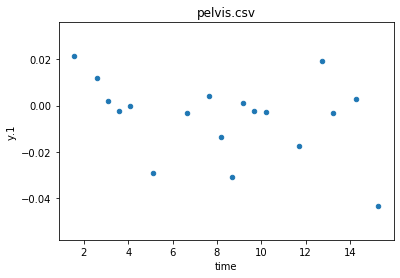

[0, 19]
[0, 19]
[24, 14]
[21, 12]
[0, 6]
[0, 10]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
4   -2.278183 -0.322426  0.261630  -0.607327 -0.539245  0.040001   2.571023   
5   -3.199817 -0.344138  0.178690  -0.037684 -0.007744  0.040001   3.071494   
6    0.890324  0.106043 -0.032422   0.052284 -0.002111  0.016041   3.577557   
7    1.237810  0.351589 -0.148269   0.024322 -0.001490  0.057526   4.089488   
9    0.736280 -0.345045 -0.196631   0.034012 -0.083315 -1.208103   5.106799   
10  -2.889755 -0.209140 -0.040989  -0.112147 -0.165140 -0.605730   6.132798   
11  -1.924652 -0.216453  0.114652   0.023915 -0.002338 -0.003357   6.641951   
12  -0.208605  0.362813 -0.145104   0.048461 -0.001681  0.047500   7.150146   
13   1.507441 -0.120859 -0.200065  -0.297300 -0.203977 -0.798108   7.662948   
17  -3.254130 -0.340882  0.182260  -0.049350 -0.019969  0.060692   9.690443   
18   0.315266  0.040858 -0.009684   0.050450 -0.002252  0.008885  10.191920   
20 

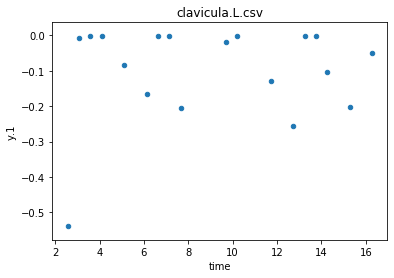

[0, 19]
[0, 16]
[8, 25]
[3, 17]
[2, 16]
[11, 19]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2    0.457647 -1.231377 -0.285195  -1.504481 -1.187557 -3.069092   1.555731   
3   -1.675303  0.696738  0.121442   0.781284  0.585085 -2.170418   2.057780   
6    1.429994 -0.521290 -0.165739  -0.796616 -0.644279 -1.271744   3.577557   
7    2.188512 -1.586993 -0.407064  -2.192375 -1.920792 -4.374837   4.089488   
8    2.947031 -1.144351 -0.508855  -1.990599 -1.159321 -2.661129   4.597568   
9    1.365103 -0.474619  0.025700  -0.276511 -0.464185 -1.252157   5.106799   
11  -3.110009  1.133429 -0.025918   0.861009 -1.225998 -2.922680   6.641951   
12  -0.274781 -1.676620 -0.220322  -1.826750 -1.987810 -4.593203   7.150146   
13   2.560447 -0.910737 -0.410404  -1.634838 -1.068314 -2.284717   7.662948   
14   0.671448 -1.330689 -0.352428  -1.727341 -1.285514 -3.283127   8.171892   
15  -1.217551  0.519302  0.116318   0.643123  0.425401 -1.865353   8.672464   
18 

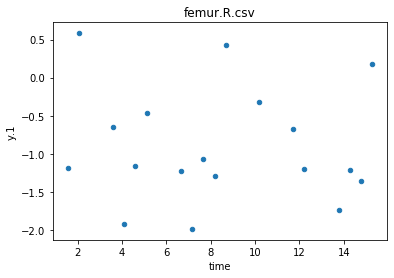

[0, 18]
[0, 17]
[9, 4]
[17, 23]
[13, 3]
[6, 14]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2  -20.701533  0.038940  0.168402   0.108627 -0.059245 -0.040204   1.555731   
3   -0.093767 -0.049173 -0.306210   0.364048 -0.049691  0.037809   2.057780   
4    0.026027 -0.039957  0.104215   0.104710 -0.040136 -0.003805   2.571023   
7   -0.042199  0.014869 -0.026448  -0.160237  0.050492  0.027379   4.089488   
8    0.026324  0.007325 -0.227255   0.356727 -0.049673  0.058563   4.597568   
9    0.035608 -0.000219 -0.428062   0.356662 -0.000839  0.024151   5.106799   
12   0.011914 -0.010603 -0.357524  -0.667499  0.027143  0.007065   7.150146   
13  -0.145980  0.015054  0.042754   0.122350 -0.015056 -0.010020   7.662948   
14  -0.114810  0.040711 -0.190074   0.230048 -0.058823  0.016389   8.171892   
15  -0.083639 -0.042430 -0.422902   0.182688 -0.064271  0.042798   8.672464   
16   0.022777 -0.040000  0.140825   0.135328 -0.069720 -0.024074   9.184596   
20  

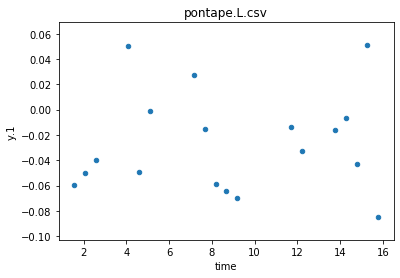

[1, 0]
[15, 27]
[16, 5]
[9, 19]
[19, 10]
[3, 7]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -0.418686 -0.441248  2.756474   2.601951 -2.188713 -2.751056   1.555731   
3   -0.418686 -0.648900 -0.615255  -0.579654 -2.188713 -2.751056   2.057780   
4   -0.407062 -0.095093 -5.639432  -5.527313 -0.735081  0.740741   2.571023   
6    0.087559 -1.436170  1.834400   1.768031  0.103228 -1.244705   3.577557   
8    0.302083 -0.245633  2.823591   1.534658  0.335647  2.023169   4.597568   
9    0.244696 -0.394374  1.479547   1.301284  0.433999  0.483849   5.106799   
11  -0.021083 -1.910746 -4.294716  -4.236532  0.005243 -0.337910   6.641951   
13   0.350301 -1.858400  1.461481  -0.659797  0.198213 -1.159669   7.662948   
15  -0.334708 -0.615084 -0.238716  -0.250409 -1.744115 -2.256752   8.672464   
16  -0.486905  1.800295 -5.068595  -5.004263 -1.253313 -0.157435   9.184596   
18   0.020400 -0.444435  0.583497   0.546859  0.161825 -0.315340  10.191920   
20  

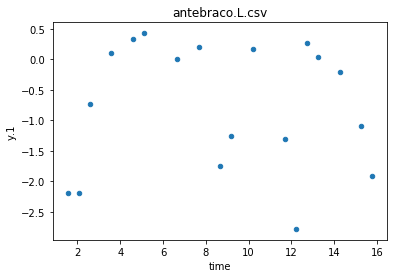

[0, 19]
[0, 11]
[24, 13]
[21, 11]
[0, 6]
[10, 2]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
3   -0.484024 -0.999907  0.466534  -2.167655 -2.236928 -1.390421   2.057780   
4   -1.025899 -1.963751  0.481488  -2.343415 -2.821747  1.154302   2.571023   
6    0.386138  0.623329 -0.175603   0.332134  0.533690 -1.308959   3.577557   
7    0.604834  1.133143 -0.422257   0.095028  0.754398 -5.485259   4.089488   
9    0.368624  0.732821 -0.204621  -0.113724 -0.354776  0.148803   5.106799   
10  -1.246007 -2.070225  0.070934  -0.658479 -1.463950  1.797317   6.132798   
11  -0.880106 -1.261699  0.346489  -0.320327 -0.532668 -0.007283   6.641951   
13   0.657754  1.165030 -0.367150  -1.020110 -1.133931 -1.811884   7.662948   
15  -0.364427 -0.731157  0.360037  -1.719892 -1.735194 -1.118835   8.672464   
18   0.133452  0.233226 -0.076477   0.170534  0.333491 -0.334282  10.191920   
20   0.530168  1.056029 -0.340598  -1.529820 -1.509684  0.398163  11.717030   
21 

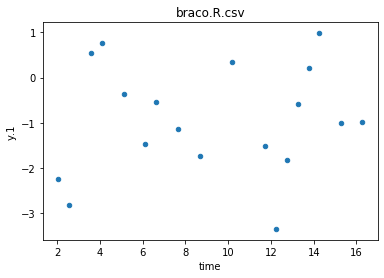

[0, 1]
[26, 19]
[10, 17]
[1, 12]
[19, 7]
[19, 5]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2    2.022410 -0.418164 -0.030607  -0.087261  0.012555 -0.000216   1.555731   
4   -2.422127  0.306074 -0.029216  -0.063087  0.012555 -0.000216   2.571023   
5   -3.208128  0.105067 -0.017372  -0.025794  0.002140 -0.001411   3.071494   
6    0.890041 -0.095939  0.023815   0.009905 -0.002445 -0.001375   3.577557   
7    1.336655 -0.323212  0.002607  -0.030065 -0.000387 -0.002812   4.089488   
9    0.822874 -0.160113  0.003132  -0.014623 -0.028873 -0.004249   5.106799   
11  -1.928380  0.211244  0.002720   0.024694 -0.003149 -0.003180   6.641951   
13   1.567994 -0.215719 -0.002032   0.004285 -0.004210  0.000154   7.662948   
14   0.419343 -0.453214 -0.033640  -0.097319 -0.002720  0.000091   8.171892   
16  -2.337574  0.281485 -0.017725  -0.050949 -0.001230 -0.000811   9.184596   
17  -3.264457  0.124747 -0.024999  -0.036137  0.009063  0.000047   9.690443   
18 

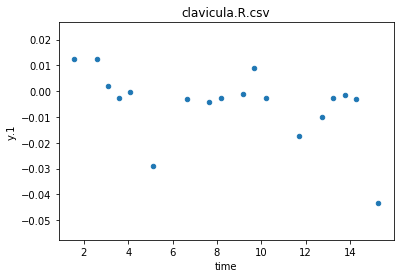

[0, 19]
[0, 16]
[8, 18]
[3, 17]
[21, 2]
[11, 19]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2  -17.020875 -0.878293 -0.866392  -1.520353 -0.895776 -2.543185   1.555731   
3   -1.425759  0.476977  0.022513   0.275942  0.542212 -1.914765   2.057780   
6    1.236416 -0.444839 -0.123341  -0.241289 -0.589894 -1.286345   3.577557   
7    1.875074 -1.283458 -2.277491  -3.243374 -1.283699 -3.731812   4.089488   
8    2.513731 -0.893464 -0.613286  -1.067020 -0.893821 -2.458081   4.597568   
9    1.091139 -0.367370 -0.630158  -1.015668 -0.322956 -0.991700   5.106799   
11  -2.506545  0.877795  1.388110  -2.143234 -0.892568 -2.453121   6.641951   
12  -0.184829 -1.293061 -2.033412  -3.270800 -1.462181 -3.914542   7.150146   
13   2.136887 -0.825366 -1.063937  -1.457676 -0.771506 -2.188949   7.662948   
14   0.543086 -0.957027 -0.872795  -1.546708 -0.970734 -2.761935   8.171892   
15  -1.050714  0.343186 -0.122735   0.027880  0.422855 -1.673532   8.672464   
18 

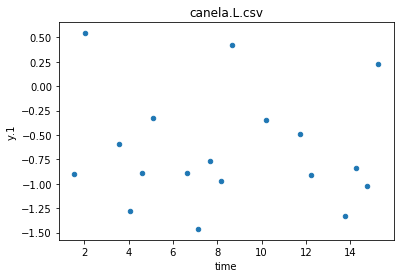

[0, 19]
[0, 11]
[17, 1]
[11, 21]
[19, 7]
[19, 5]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -4.732418 -0.068031 -0.061436  -0.087261  0.012427  0.000535   1.555731   
4   -2.450685 -0.036951  0.008950  -0.063028  0.012427  0.000535   2.571023   
5   -3.221771 -0.192110  0.019476  -0.025855  0.002195 -0.001159   3.071494   
6    0.893637  0.053637  0.010622   0.009875 -0.002231 -0.002050   3.577557   
7    1.356777 -0.003654 -0.006854  -0.030080 -0.000358  0.000238   4.089488   
9    0.837412 -0.018989 -0.010200  -0.014683 -0.028586 -0.004135   5.106799   
11  -1.936470 -0.117315 -0.014370  -0.033057 -0.002877 -0.003476   6.641951   
13   1.581694  0.052083 -0.022622   0.004344 -0.004225  0.000119   7.662948   
14   0.414508 -0.078179 -0.066768  -0.097319 -0.002768 -0.000060   8.171892   
16  -2.369733 -0.009791  0.020360  -0.050949 -0.001311 -0.000238   9.184596   
17  -3.278788 -0.191911  0.013344  -0.036077  0.009049  0.000483   9.690443   
18 

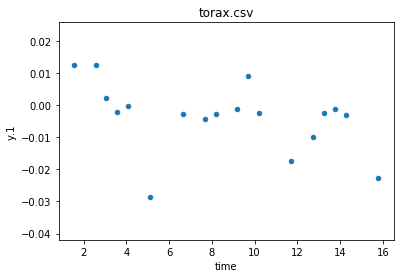

[19, 7]
[0, 24]
[24, 18]
[0, 14]
[3, 17]
[12, 19]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -0.057472 -4.583717 -2.087977  -4.581056  0.527629 -0.043782   1.555731   
3   -0.140676 -1.026499 -0.374466  -0.797011 -0.115433 -0.343320   2.057780   
4   -0.223879 -1.908611  1.339046   2.987033 -1.186589 -0.607929   2.571023   
6   -0.453789  0.592875 -0.399245  -0.447094  0.112286 -0.872539   3.577557   
8   -0.075771  0.658668 -2.023776  -4.303504  0.523583 -0.163015   4.597568   
9    0.027442  0.724460 -0.698518  -1.650676  0.204657  0.002277   5.106799   
10  -0.598317 -1.969484  0.060232  -0.095443 -0.236854  1.169599   6.132798   
11  -0.498972 -1.223704  0.818982   1.459789 -0.421895 -1.162324   6.641951   
12  -0.139570 -0.057230 -1.334023  -2.204591 -0.606935 -3.494246   7.150146   
13  -0.102522  1.109244 -1.055705  -2.356890 -0.039754 -1.399113   7.662948   
14  -0.065474  0.176557 -2.273497  -4.994521 -0.045909 -0.079630   8.171892   
15

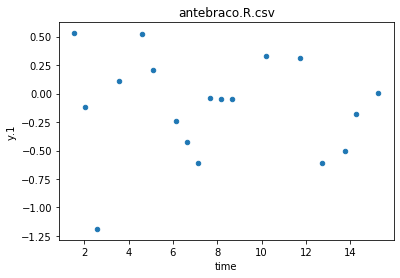

[0, 19]
[0, 11]
[17, 1]
[11, 21]
[19, 7]
[19, 5]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -4.732418 -0.068031 -0.061436  -0.087261  0.012427  0.000535   1.555731   
4   -2.450685 -0.036951  0.008950  -0.063028  0.012427  0.000535   2.571023   
5   -3.221771 -0.192110  0.019477  -0.025855  0.002195 -0.001159   3.071494   
6    0.893637  0.053637  0.010622   0.009875 -0.002231 -0.002050   3.577557   
7    1.356777 -0.003654 -0.006853  -0.030080 -0.000358  0.000238   4.089488   
9    0.837412 -0.018989 -0.010201  -0.014683 -0.028586 -0.004135   5.106799   
11  -1.936470 -0.117315 -0.014370  -0.033057 -0.002877 -0.003476   6.641951   
13   1.581694  0.052083 -0.022621   0.004344 -0.004225  0.000119   7.662948   
14   0.414508 -0.078179 -0.066767  -0.097319 -0.002768 -0.000060   8.171892   
16  -2.369733 -0.009791  0.020361  -0.050949 -0.001311 -0.000238   9.184596   
17  -3.278788 -0.191911  0.013345  -0.036077  0.009049  0.000483   9.690443   
18 

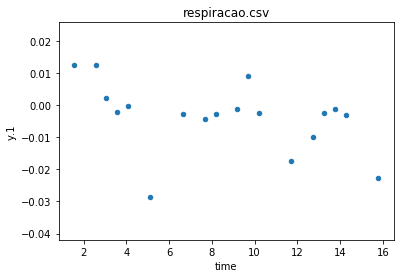

[0, 19]
[0, 16]
[5, 21]
[10, 14]
[21, 3]
[6, 14]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -6.490112 -1.027149  0.210675   0.007580 -0.861089 -3.118781   1.555731   
3   -1.719654  0.604307 -0.115122   0.046319  0.426657  1.588948   2.057780   
4   -4.084686  0.517711 -0.534457  -0.684210  0.009863  0.050775   2.571023   
6    1.530238 -0.484956  0.227131  -0.260327 -0.406931 -1.487398   3.577557   
8    3.103672 -1.004271  0.162977  -0.123781 -0.821983 -2.958779   4.597568   
9    1.370013 -0.408978  0.098823   0.012765 -0.386001 -1.254428   5.106799   
11  -3.268581  1.146759 -0.155401  -0.487065  0.822528  3.153935   6.641951   
12  -0.264805 -1.550070  0.086420  -0.229831 -1.358473 -5.003266   7.150146   
14   0.741010 -1.118409  0.233258   0.027403 -0.918866 -3.374933   8.171892   
15  -1.256951  0.450698 -0.077082   0.061026  0.300559  1.160718   8.672464   
16  -3.938851  1.306223 -0.466979  -0.562762 -0.115476 -0.316465   9.184596   
20 

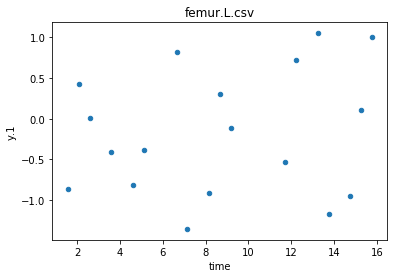

[1, 0]
[7, 18]
[23, 3]
[7, 14]
[21, 17]
[12, 10]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2    0.093980  0.050244 -0.023014   0.412595  0.026632  0.035111   1.555731   
3   -0.143246 -0.032860 -0.023014   0.219522  0.048135  0.083408   2.057780   
4   -0.155672 -0.115963 -0.223786   0.258593 -0.022859  0.131705   2.571023   
6   -0.073367 -0.066408 -0.355647   0.167061 -0.097858 -0.162669   3.577557   
7    0.021364  0.047156  0.044593   0.075529  0.020093 -0.022618   4.089488   
8    0.070427 -0.087888 -0.442879  -0.010281 -0.003555  0.003640   4.597568   
10   0.019889 -0.067895 -0.193385  -0.096092  0.048653  0.029898   6.132798   
12   0.031412 -0.047845 -0.288404  -0.108063  0.063479  0.027383   7.150146   
13  -0.159413  0.036384  0.035879  -0.120035  0.036323  0.107002   7.662948   
14  -0.165511  0.000828 -0.006624   0.148287  0.009167  0.105654   8.171892   
16   0.081945 -0.096162 -0.125988  -0.170058 -0.031340 -0.108475   9.184596   
19 

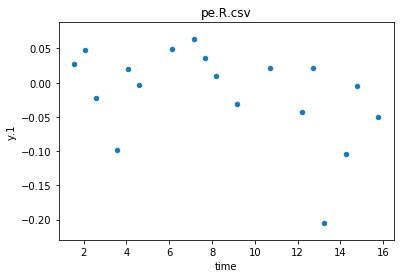

[0, 19]
[0, 11]
[17, 1]
[11, 21]
[19, 7]
[19, 5]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -4.732418 -0.068031 -0.061438  -0.087261  0.012427  0.000535   1.555731   
4   -2.450685 -0.036951  0.008949  -0.063028  0.012427  0.000535   2.571023   
5   -3.221771 -0.192110  0.019474  -0.025855  0.002195 -0.001159   3.071494   
6    0.893637  0.053638  0.010619   0.009875 -0.002231 -0.002050   3.577557   
7    1.356777 -0.003653 -0.006856  -0.030080 -0.000358  0.000238   4.089488   
9    0.837412 -0.018988 -0.010203  -0.014683 -0.028586 -0.004135   5.106799   
11  -1.936470 -0.117315 -0.014372  -0.033057 -0.002877 -0.003476   6.641951   
13   1.581694  0.052083 -0.022624   0.004344 -0.004225  0.000119   7.662948   
14   0.414508 -0.078179 -0.066770  -0.097319 -0.002738 -0.000060   8.171892   
16  -2.369733 -0.009791  0.020358  -0.050949 -0.001251 -0.000238   9.184596   
17  -3.278788 -0.191911  0.013342  -0.036137  0.008989  0.000483   9.690443   
18 

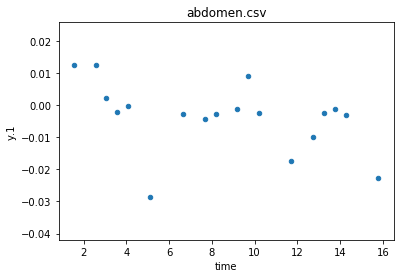

[1, 0]
[15, 27]
[3, 8]
[17, 18]
[19, 10]
[7, 0]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
3   -0.569256 -0.219218  1.108601   0.735960 -3.279835 -2.744613   2.057780   
4   -0.848856  0.198404  0.028348  -0.435982 -4.216210 -1.948873   2.571023   
6    0.258826 -1.629412 -1.051905  -1.607923  0.672088 -1.153133   3.577557   
7    0.570127 -5.499163 -4.249213  -6.672028  1.533725 -3.842259   4.089488   
8    0.881429 -1.050759 -1.881895  -1.737100  2.395361 -1.492444   4.597568   
9    0.376968 -0.548866 -1.141590  -1.437195  1.900939 -2.997721   5.106799   
12   0.096603 -5.916502 -3.957940  -6.168882  2.421075 -4.502997   7.150146   
13   0.603931 -2.202755 -2.243062  -3.184504  2.493290 -0.552995   7.662948   
15  -0.441256 -0.269342  0.734569   0.346447 -2.444586 -2.183136   8.672464   
16  -0.889917  2.360039  0.176713  -0.107389 -4.560493 -0.805082   9.184596   
18   0.087570 -0.531621 -0.381143  -0.561225  0.340976 -0.279359  10.191920   
19  

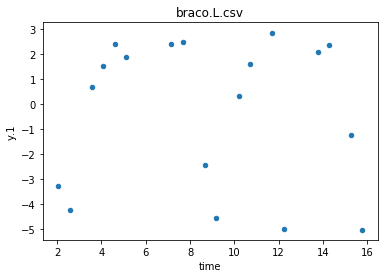

[1, 0]
[7, 18]
[23, 3]
[7, 14]
[21, 17]
[12, 10]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2    0.093978  0.050188 -0.023044   0.412535  0.026617  0.035111   1.555731   
3   -0.143255 -0.032925 -0.023044   0.219522  0.048135  0.083408   2.057780   
4   -0.155677 -0.116039 -0.223794   0.258593 -0.022866  0.131705   2.571023   
6   -0.073367 -0.066473 -0.355653   0.167031 -0.097866 -0.162661   3.577557   
7    0.021367  0.047100  0.044529   0.075470  0.020101 -0.022628   4.089488   
8    0.070429 -0.087919 -0.442841  -0.010314 -0.003551  0.003633   4.597568   
10   0.019875 -0.067945 -0.193389  -0.096098  0.048653  0.029895   6.132798   
12   0.031406 -0.047915 -0.288419  -0.108066  0.063474  0.027383   7.150146   
13  -0.159421  0.036330  0.035862  -0.120035  0.036326  0.107061   7.662948   
14  -0.165520  0.000758 -0.006643   0.148287  0.009178  0.105714   8.171892   
16   0.081935 -0.096203 -0.125980  -0.170037 -0.031344 -0.108474   9.184596   
19 

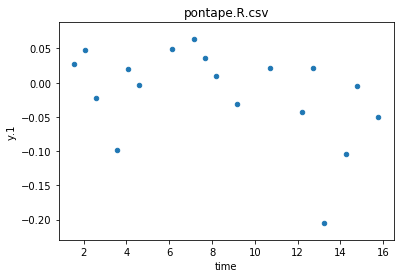

[0, 19]
[0, 11]
[3, 14]
[1, 11]
[18, 6]
[19, 4]
    LinVel: x         y         z  AngVel: x       y.1       z.1       time  \
2   -4.545250 -0.092047 -0.058577  -0.087182  0.012724  0.001843   1.555731   
4   -2.450788 -0.024268  0.037238  -0.063008  0.012724 -0.000737   2.571023   
6    0.893819  0.051959 -0.010276  -0.008694 -0.002895 -0.003317   3.577557   
7    1.356292 -0.013988 -0.075846   0.045620 -0.000417 -0.000715   4.089488   
9    0.837870 -0.024832 -0.011651  -0.014781 -0.029605 -0.003835   5.106799   
11  -1.936387 -0.099008  0.003546   0.024616 -0.003776 -0.003956   6.641951   
13   1.581634  0.037953 -0.047526   0.004330 -0.004225  0.000060   7.662948   
14   0.415097 -0.104066 -0.062345  -0.097281 -0.002709  0.000477   8.171892   
16  -2.369406  0.004798  0.040779  -0.050953 -0.001192  0.000894   9.184596   
18   0.316184  0.021160 -0.001858  -0.043018 -0.003286 -0.003712  10.191920   
20   1.191519 -0.041558 -0.025208  -0.035084 -0.017504 -0.000486  11.717030   
21  

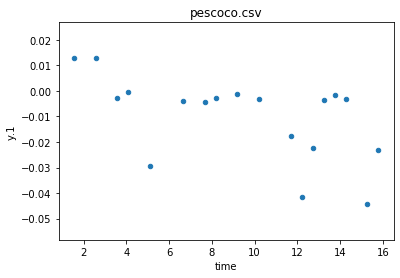

In [122]:
for file in files:
    df = pd.read_csv(file)
    for axis in range(6):
        df = filter_data(df, axis, by_axis=True)
    df.to_csv(path_or_buf="./final_csv/{}".format(file), index=False)
    print(df)
    df.plot(kind="scatter", x="time", y="y.1")
    plt.title(file)
    plt.show()